In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(2349383)

mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [20]:
x = tf.placeholder(tf.float32, [None, 784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))
f = tf.matmul(x, w) + w0
p = tf.nn.softmax(f)

In [27]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [30]:
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [31]:
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

Exception AssertionError: AssertionError("Nesting violated for default stack of <type 'weakref'> objects",) in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x6ef0310>> ignored


In [32]:
i = 0
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, t: batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:mnist.test.images, t: mnist.test.labels})
        print ('Step: %d, Loss: %f, Accuracy: %f' % (i, loss_val, acc_val))

Step: 100, Loss: 7632.106934, Accuracy: 0.848700
Step: 200, Loss: 5439.868164, Accuracy: 0.876700
Step: 300, Loss: 4591.149414, Accuracy: 0.891300
Step: 400, Loss: 4129.643066, Accuracy: 0.895600
Step: 500, Loss: 3837.954346, Accuracy: 0.901700
Step: 600, Loss: 3652.112061, Accuracy: 0.905000
Step: 700, Loss: 3485.651123, Accuracy: 0.908300
Step: 800, Loss: 3369.762451, Accuracy: 0.910000
Step: 900, Loss: 3263.408691, Accuracy: 0.912100
Step: 1000, Loss: 3206.833008, Accuracy: 0.913800
Step: 1100, Loss: 3141.044434, Accuracy: 0.915500
Step: 1200, Loss: 3087.577148, Accuracy: 0.915800
Step: 1300, Loss: 3065.728516, Accuracy: 0.915300
Step: 1400, Loss: 2998.834229, Accuracy: 0.917300
Step: 1500, Loss: 2975.350098, Accuracy: 0.917900
Step: 1600, Loss: 2958.584229, Accuracy: 0.919400
Step: 1700, Loss: 2953.848633, Accuracy: 0.918200
Step: 1800, Loss: 2906.128662, Accuracy: 0.918900
Step: 1900, Loss: 2872.228516, Accuracy: 0.919800
Step: 2000, Loss: 2863.346680, Accuracy: 0.918800


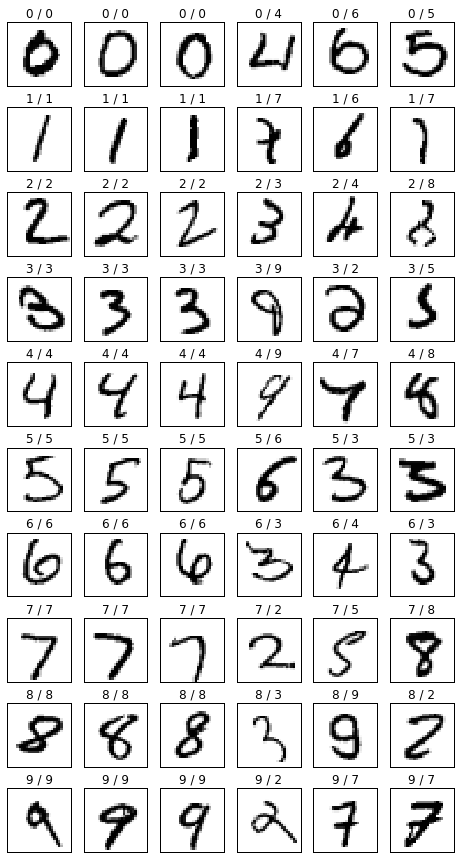

In [34]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t: labels})

fig = plt.figure(figsize=(8,15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))
            subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation="nearest")
            
            c += 1
            if c > 6:
                break